### Problem 2

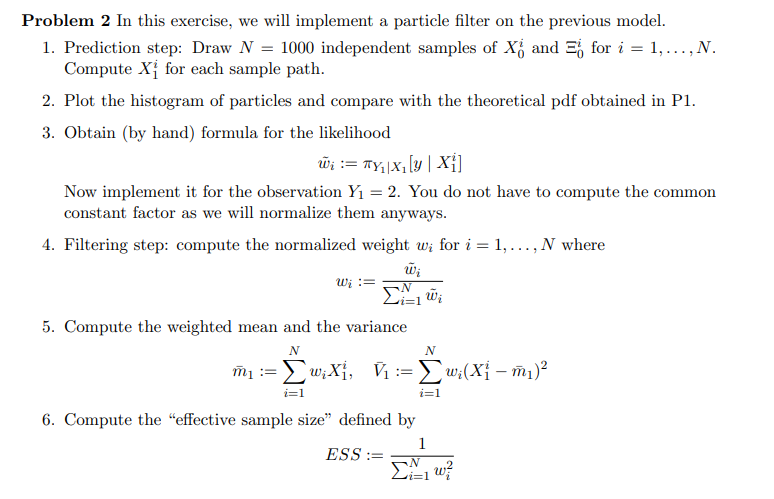

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def update_model(x_n,csi_n):
    return (1/2)*x_n+1+csi_n
def prediction_dens(x):
    return (1/np.sqrt(2*np.pi*(3/2)))*np.exp(-(1/3)*(x-1/2)**2)

# Task 1

In [3]:
N=1000
x_0=np.random.normal(-1,np.sqrt(2),N)
csi_0=np.random.normal(0,1,N)
prediction_1=update_model(x_0,csi_0)

# Task 2

Histogram of particles:

Text(0.5, 1.0, 'Theoretical distribution of $X_1$')

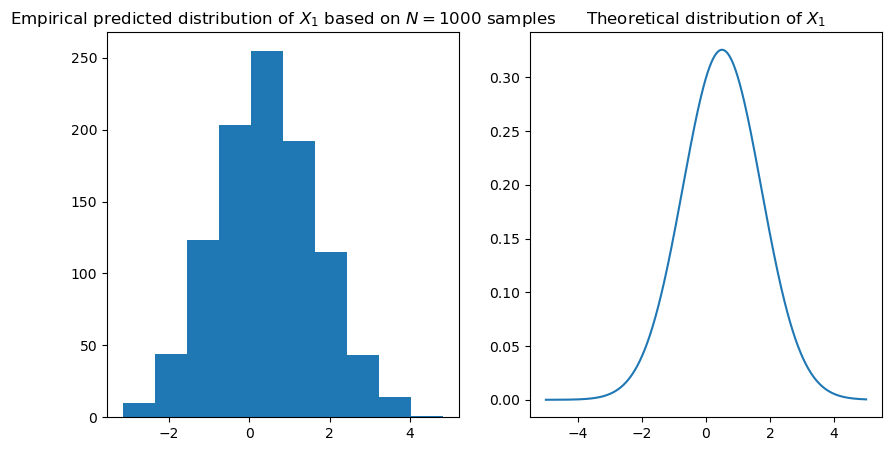

In [4]:
x=np.linspace(-5,5,1000)
fig, ax=plt.subplots(1,2, figsize=(10,5))
ax[0].hist(prediction_1);
ax[0].set_title("Empirical predicted distribution of $X_1$ based on $N=1000$ samples");
ax[1].plot(x,prediction_dens(x))
ax[1].set_title("Theoretical distribution of $X_1$")

# Task 3,4

Since $Y_1|\{X_1=x_1\}=x_1+\sqrt{2}N(0,1)$, we have that $Y_1|X_1=x_1\sim N(x_1,2)$ and then the likelihood is: <br>
$\pi_{Y_1|X_1}(y|{x_1^i})=\frac{1}{\sqrt{4\pi}}\exp\left(-\frac{1}{4}(y-{x_1}^i)^2\right)$

In [5]:
def likelihood(x,y):
    return (1/np.sqrt(4*np.pi))*np.exp(-(1/4)*(y-x)**2)
def get_weights(x,y):
    return (likelihood(x,y)/np.sum(likelihood(x,y)))

Text(0.5, 1.0, 'Likelihood for y=2')

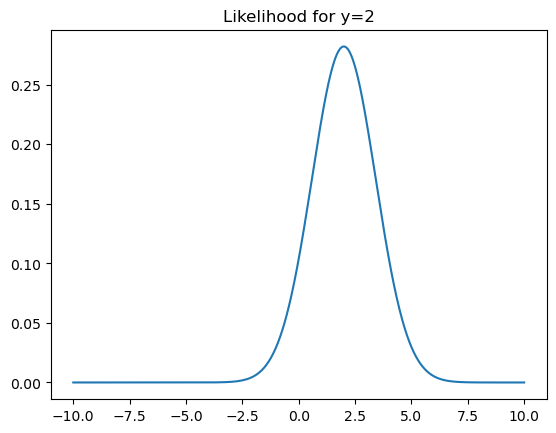

In [6]:
x=np.linspace(-10,10,1000)
plt.plot(x,likelihood(x,2))
plt.title("Likelihood for y=2")

In [7]:
weights=get_weights(prediction_1,2)

# Task 5

In [8]:
weighted_mean=np.sum(weights*prediction_1)
weighted_var=np.sum(weights*(prediction_1-weighted_mean)**2)
print("Weighted mean: ", weighted_mean, "\nWeighted variance: ", weighted_var)

Weighted mean:  1.1164120127988175 
Weighted variance:  0.8944711130606322


Theoretical values: 7/8,8/7. They are close to the empirical values.

# Task 6

Computing the effective sample size:

In [23]:
EFF=1/(np.sum(weights**2))
print("Effective sample size: ",EFF, "\nSample size: ", N)

Effective sample size:  730.5126691420627 
Sample size:  1000
